# Load and clean data

In [1]:
import sys
sys.path.insert(0, '../src')
from src.data.make_dataset import clean_data, load_raw_data

data = load_raw_data()
data = clean_data(data)

# Some visualizations

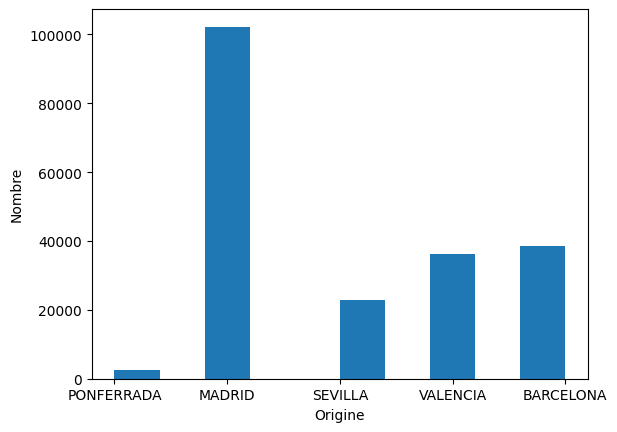

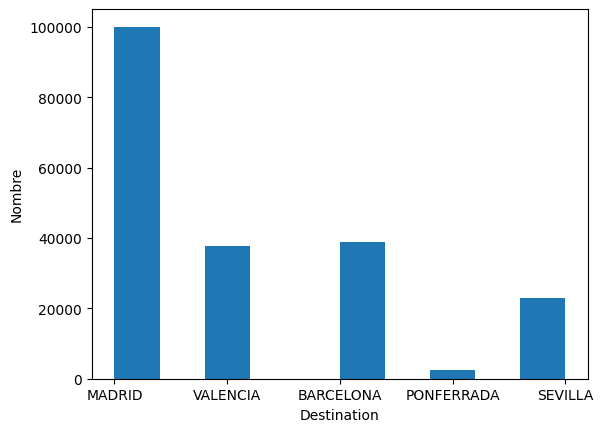

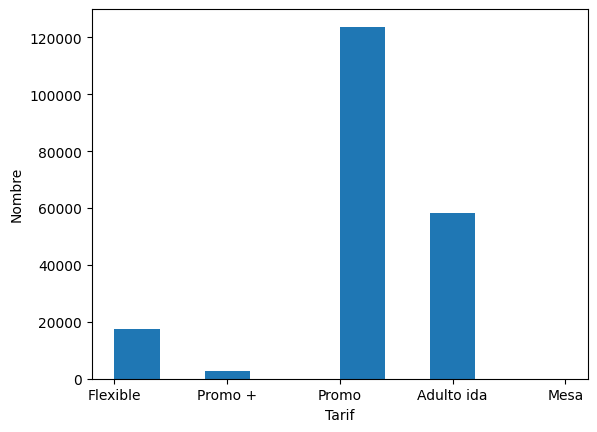

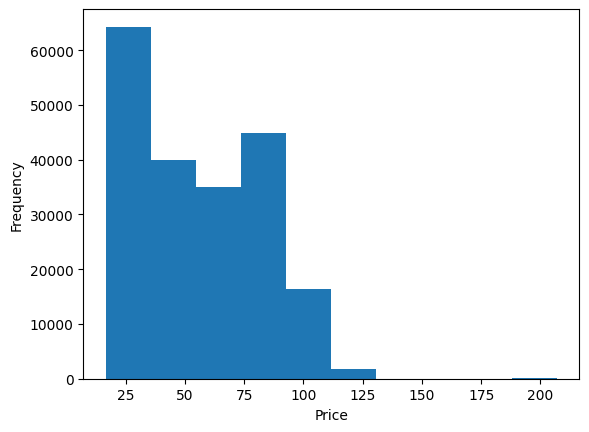

In [2]:
from src.visualization.visualize import plot_nb_train_destination, plot_nb_train_origin, plot_nb_train_tarif, plot_price_distribution

plot_nb_train_origin(data)
plot_nb_train_destination(data)
plot_nb_train_tarif(data)
plot_price_distribution(data)

# Process data

In [3]:
from src.data.make_dataset import process_data
data = process_data(data)

# Analyse de corrélation

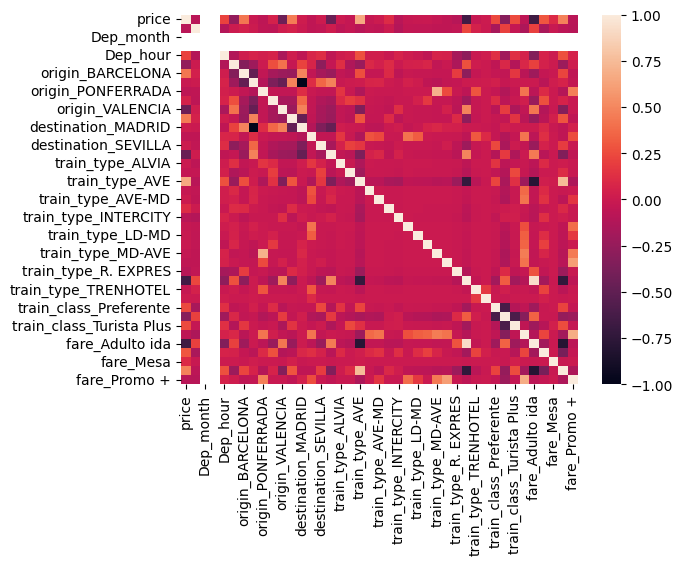

In [4]:
from src.features.build_features import analyse_corr
analyse_corr(data)

# Random Forest Classification

Précision du modèle de Random Forest Classifier : 0.9999505745706165
              precision    recall  f1-score   support

         Bas       1.00      1.00      1.00     18941
       Moyen       1.00      1.00      1.00     18731
       Élevé       1.00      1.00      1.00      2793

    accuracy                           1.00     40465
   macro avg       1.00      1.00      1.00     40465
weighted avg       1.00      1.00      1.00     40465



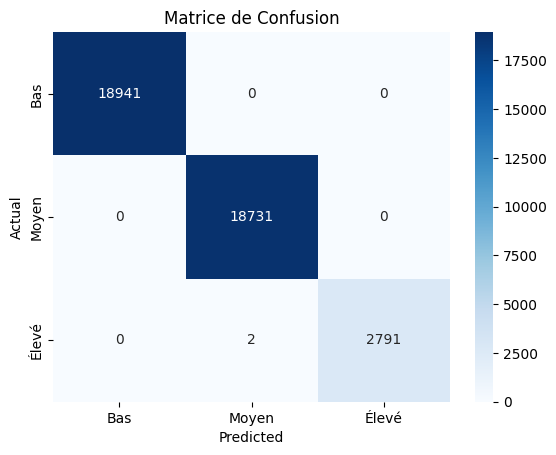

In [5]:
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from src.models.predict_model import accuracy, predict_rf_classification
from src.models.train_model import train_random_forest_classifier
from src.visualization.visualize import matrix_conf

seuils = [0, 50, 100, float('inf')]
labels = ['Bas', 'Moyen', 'Élevé']
data['price_category'] = pd.cut(data['price'], bins=seuils, labels=labels, right=False)

X = data.drop(columns=['price_category'], axis=1) 
y = data['price_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_clf_model = train_random_forest_classifier(X_train, y_train, 20, 8)
rf_clf_prediction = predict_rf_classification(rf_clf_model, X_test)
print(f"Précision du modèle de Random Forest Classifier : {accuracy(y_test, rf_clf_prediction)}")
print(classification_report(y_test, rf_clf_prediction))
matrix_conf(y_test, rf_clf_prediction, data['price_category'])

# Division des données (80%-20% : train-test)

In [6]:
from src.features.build_features import split_data

X_train_bas, X_test_bas, y_train_bas, y_test_bas = split_data(data, 'Bas')
X_train_moyen, X_test_moyen, y_train_moyen, y_test_moyen = split_data(data, 'Moyen')
X_train_élevé, X_test_élevé, y_train_élevé, y_test_élevé = split_data(data, 'Élevé')

# Régression linéaire - Catégorie de prix 'Bas'

R² =  0.6684426271441986
MSE =  19.362197548751183
RMSE =  4.400249714362945


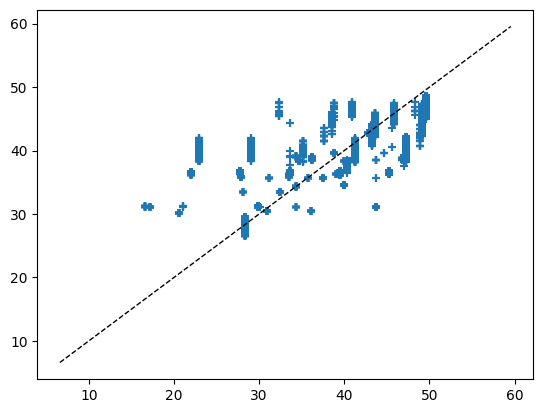

In [7]:
from sklearn.linear_model import LinearRegression
from src.features.build_features import show_metrics
from src.models.predict_model import predict_linear_regression
from src.models.train_model import train_linear_regression
from src.visualization.visualize import plot_regression


lr_model = train_linear_regression(X_train_bas, y_train_bas)
lr_prediction = predict_linear_regression(lr_model, X_test_bas)
plot_regression(LinearRegression, y_test_bas, lr_prediction)
show_metrics(y_test_bas, lr_prediction)

# Arbre de décison : CART - Catégorie de prix 'Moyen'

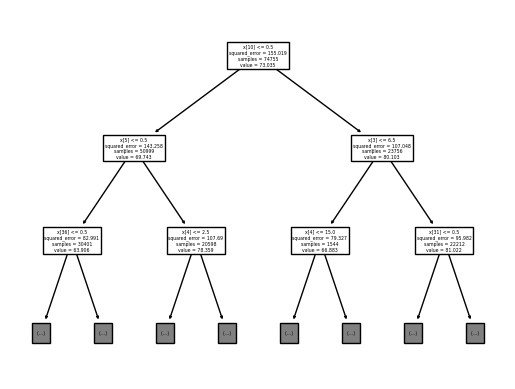

R² =  0.9727990375005084
MSE =  4.165667049315716
RMSE =  2.040996582387074


In [8]:
from src.features.build_features import show_metrics
from src.models.predict_model import predict_cart
from src.models.train_model import train_cart
from src.visualization.visualize import cart_tree


cart_model = train_cart(X_train_moyen, y_train_moyen)
cart_tree(cart_model, 2)
cart_prediction = predict_cart(cart_model, X_test_moyen)
show_metrics(y_test_moyen, cart_prediction)

# Random Forest Regressor - Catégorie 'Elevé'

R² =  0.9998171708981922
MSE =  0.01853724423633492
RMSE =  0.1361515487841946


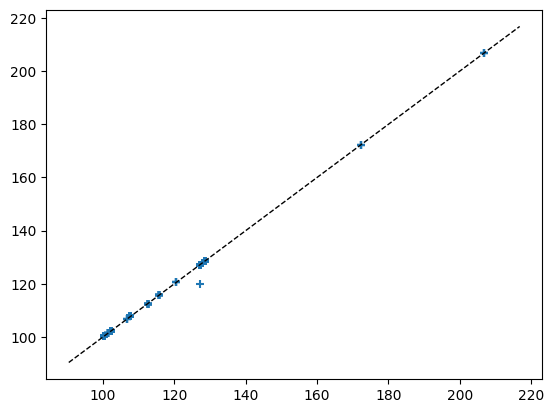

In [9]:
from sklearn.ensemble import RandomForestRegressor
from src.models.predict_model import predict_rf_regressor
from src.models.train_model import train_random_forest_regressor
from src.visualization.visualize import plot_regression


rf_reg_model = train_random_forest_regressor(X_train_élevé, y_train_élevé)
rf_reg_prediction = predict_rf_regressor(rf_reg_model, X_test_élevé)
plot_regression(RandomForestRegressor, y_test_élevé, rf_reg_prediction)
show_metrics(y_test_élevé, rf_reg_prediction)